In [141]:
# We import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
plt.rcParams['figure.figsize']= 15, 6
plt.rcParams['axes.grid']=True

In [2]:
# To load our dataset
dateparse= lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data=pd.read_csv('Time_series_data.csv',parse_dates=['Date'], index_col='Date', date_parser=dateparse)
data.head()

,Daily_Sales,Customer_count,Day of Week
Date,,,
2015-01-01,113110.0,113.0,5
2015-01-02,118890.0,95.0,6
2015-01-03,119020.0,117.0,7
2015-01-04,106590.0,124.0,1
2015-01-05,167530.0,224.0,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1673 entries, 2015-01-01 to 2019-07-31
Data columns (total 3 columns):
Daily_Sales       1649 non-null float64
Customer_count    1663 non-null float64
Day of Week       1673 non-null int64
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [4]:
data.describe()

,Daily_Sales,Customer_count,Day of Week
count,1.649000e+03,1663.000000,1673.000000
mean,3.014730e+05,239.642814,4.000000
std,1.475027e+05,74.781229,2.000598
min,5.958000e+04,35.000000,1.000000
25%,2.158300e+05,172.500000,2.000000
50%,2.891200e+05,253.000000,4.000000
75%,3.596500e+05,297.000000,6.000000
max,3.905350e+06,469.000000,7.000000


In [5]:
data.shape

(1673, 3)

In [6]:
# data extraction
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
data['WeekOfYear'] = data.index.weekofyear

# adding new variable
data['SalePerCustomer'] = data['Daily_Sales']/data['Customer_count']
data['SalePerCustomer'].describe()

count     1644.000000
mean      1259.217018
std        433.088371
min        604.310345
25%       1055.971674
50%       1177.528525
75%       1377.871547
max      14149.818841
Name: SalePerCustomer, dtype: float64

In [6]:
data.head()

,Daily_Sales,Customer_count,Day of Week
Date,,,
2015-01-01,113110.0,113.0,5
2015-01-02,118890.0,95.0,6
2015-01-03,119020.0,117.0,7
2015-01-04,106590.0,124.0,1
2015-01-05,167530.0,224.0,2


In [7]:
# To check for missing values
x=data.isnull().sum()
x

Daily_Sales       24
Customer_count    10
Day of Week        0
dtype: int64

In [8]:
# Dropping the missing values
data.dropna(inplace=True)

In [9]:
# Confirming the missing values have been dropped
data.isnull().sum()

Daily_Sales       0
Customer_count    0
Day of Week       0
dtype: int64

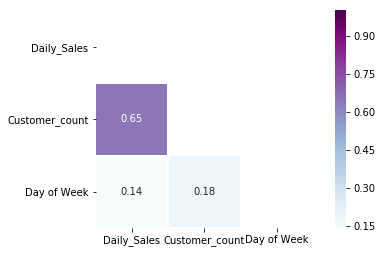

In [11]:
# Compute the correlation matrix 

corr_all = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (8, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,annot=True,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [12]:
# Resampling our data to average monthly sales
y=data['Daily_Sales'].resample('MS').mean()

In [128]:
z= data['Daily_Sales'].resample('W').apply(sum)

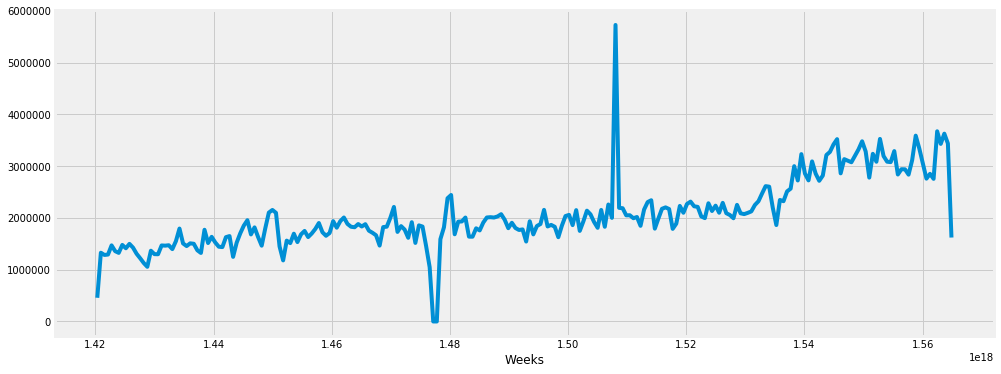

In [142]:
plt.plot(z)
plt.xlabel('Weeks')
plt.show()

In [16]:
# Importing the necesary libraries
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [18]:
data['Date']=data.index

In [19]:
data.head()

,Daily_Sales,Customer_count,Day of Week,Date
Date,,,,
2015-01-01,113110.0,113.0,5,2015-01-01
2015-01-02,118890.0,95.0,6,2015-01-02
2015-01-03,119020.0,117.0,7,2015-01-03
2015-01-04,106590.0,124.0,1,2015-01-04
2015-01-05,167530.0,224.0,2,2015-01-05


In [61]:
data.shape

(1644, 4)

In [28]:
b=data.loc[:, ['Daily_Sales', 'Date']]

In [29]:
b.head()

,Daily_Sales,Date
Date,,
2015-01-01,113110.0,2015-01-01
2015-01-02,118890.0,2015-01-02
2015-01-03,119020.0,2015-01-03
2015-01-04,106590.0,2015-01-04
2015-01-05,167530.0,2015-01-05


In [43]:
b.columns= ['y', 'ds']

In [44]:
b.index= range(len(b))

In [45]:
b.head()

,y,ds
0,113110.0,2015-01-01
1,118890.0,2015-01-02
2,119020.0,2015-01-03
3,106590.0,2015-01-04
4,167530.0,2015-01-05


In [85]:
b.tail(30)

,y,ds
1614,571000.0,2019-07-02
1615,595650.0,2019-07-03
1616,572200.0,2019-07-04
1617,815400.0,2019-07-05
1618,288600.0,2019-07-06
1619,281700.0,2019-07-07
1620,465500.0,2019-07-08
1621,532200.0,2019-07-09
1622,552700.0,2019-07-10
1623,593500.0,2019-07-11


In [111]:
prediction_size = 30
train = b[:-prediction_size]
valid = b[-prediction_size:]
train.tail(n=3)

,y,ds
1611,454200.0,2019-06-29
1612,534850.0,2019-06-30
1613,548000.0,2019-07-01


In [118]:
m = Prophet(growth='linear', interval_width=0.95, daily_seasonality=False, 
               weekly_seasonality=False, yearly_seasonality=False).add_seasonality(
    name='monthly', period=30.5, fourier_order=12).add_seasonality(
    name='yearly', period=365.25, fourier_order=20).add_seasonality(name='weekly', period=7, fourier_order=12)

m.fit(train);

In [119]:
future = m.make_future_dataframe(periods=prediction_size)
future.tail(n=3)

,ds
1641,2019-07-29
1642,2019-07-30
1643,2019-07-31


In [120]:
forecast = m.predict(future)
forecast.tail(n=3)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
1641,2019-07-29,463245.213716,462765.008023,463801.114483,324049.574457,713529.071853,55884.798445,55884.798445,55884.798445,2256.627769,...,0.0,0.0,0.0,41686.318151,41686.318151,41686.318151,11941.852525,11941.852525,11941.852525,519130.012161
1642,2019-07-30,463646.255711,463136.231623,464230.430321,345402.301836,770611.231158,94840.909431,94840.909431,94840.909431,10815.304219,...,0.0,0.0,0.0,70779.999311,70779.999311,70779.999311,13245.605902,13245.605902,13245.605902,558487.165142
1643,2019-07-31,464047.297706,463516.823416,464659.866383,369024.310024,771568.291694,105786.529116,105786.529116,105786.529116,18848.999114,...,0.0,0.0,0.0,73158.848633,73158.848633,73158.848633,13778.681369,13778.681369,13778.681369,569833.826822


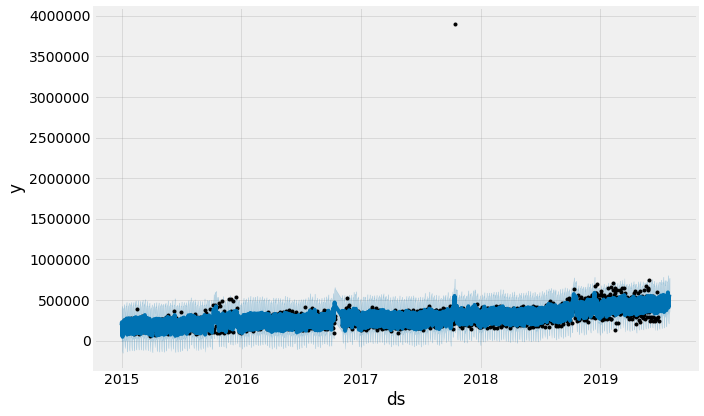

In [121]:
m.plot(forecast);

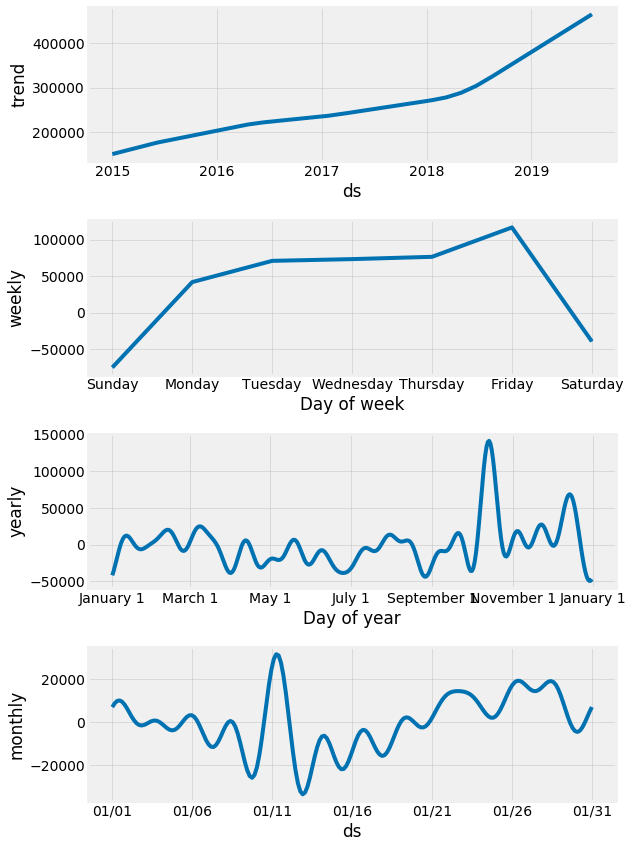

In [122]:
m.plot_components(forecast);

In [123]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [124]:
cmp_df = make_comparison_dataframe(b, forecast)
cmp_df.tail(n=3)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2019-07-29,519130.012161,324049.574457,713529.071853,503700.0
2019-07-30,558487.165142,345402.301836,770611.231158,566600.0
2019-07-31,569833.826822,369024.310024,771568.291694,550600.0


In [125]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [126]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 13.914443002166568
MAE 66138.93890454741


In [1]:
# This is an alternative custom function for calculating the mape
'''
def mean_absolute_percentage_error(y_true, y_pred): 
    #Calculates MAPE given y_true and y_pred
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true,y_pred)
                   
'''

## AUTO Arima

In [64]:
#building the model
from pmdarima import auto_arima

In [63]:
cols=['ds']

train_df.drop(cols, axis=1, inplace=True)
valid_df.drop(cols, axis=1, inplace=True)

C:\Users\CHARLIE\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\CHARLIE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [65]:
model= auto_arima(train_df, trace=True, error_action='ignore', supress_warnings=True)
model.fit(train_df)

C:\Users\CHARLIE\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\CHARLIE\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=42426.341, BIC=42458.656, Fit time=2.520 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=43313.274, BIC=43324.046, Fit time=0.041 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=43078.305, BIC=43094.462, Fit time=0.085 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=42493.973, BIC=42510.131, Fit time=0.663 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=42428.732, BIC=42455.662, Fit time=0.838 seconds


C:\Users\CHARLIE\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\CHARLIE\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=42411.701, BIC=42449.402, Fit time=2.358 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=42453.402, BIC=42485.717, Fit time=0.772 seconds


C:\Users\CHARLIE\AppData\Roaming\Python\Python36\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\CHARLIE\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=42344.621, BIC=42387.708, Fit time=4.945 seconds
Fit ARIMA: order=(4, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=42322.327, BIC=42376.185, Fit time=5.038 seconds


C:\Users\CHARLIE\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=42356.411, BIC=42404.883, Fit time=5.125 seconds
Fit ARIMA: order=(5, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=42251.898, BIC=42311.143, Fit time=4.411 seconds
Fit ARIMA: order=(5, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=42260.994, BIC=42314.852, Fit time=3.476 seconds


C:\Users\CHARLIE\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(5, 1, 5) seasonal_order=(0, 0, 0, 1); AIC=42118.713, BIC=42183.343, Fit time=7.037 seconds


C:\Users\CHARLIE\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 1, 5) seasonal_order=(0, 0, 0, 1); AIC=42122.457, BIC=42181.701, Fit time=7.217 seconds
Total fit time: 44.784 seconds


C:\Users\CHARLIE\AppData\Roaming\Python\Python36\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(5, 1, 5),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend=None,
      with_intercept=True)

In [66]:
fcst = model.predict(n_periods=len(valid_df))
fcst = pd.DataFrame(fcst, index=valid_df.index, columns=['Prediction'])



In [68]:
fcst.tail()

,Prediction
1639,480790.590428
1640,499876.682392
1641,427752.049094
1642,413418.315752
1643,463364.859936


In [70]:
fcst['y']=valid_df

In [71]:
fcst.head()

,Prediction,y
1614,383490.558673,571000.0
1615,453484.026799,595650.0
1616,435075.884535,572200.0
1617,397017.481395,815400.0
1618,471792.162989,288600.0


In [72]:
fcst.shape

(30, 2)

In [73]:
def mean_absolute_percentage_error(y_true, y_pred): 
    #Calculates MAPE given y_true and y_pred
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=fcst['y'],
                   y_pred=fcst['Prediction'])

33.49281034565046

## SARIMA model

In [74]:
import warnings
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [75]:
p=d=q=range(0,2)

pdq= list(itertools.product(p,d,q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for seasonal Arima...')

print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for seasonal Arima...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [90]:
b.head()

,y,ds
0,113110.0,2015-01-01
1,118890.0,2015-01-02
2,119020.0,2015-01-03
3,106590.0,2015-01-04
4,167530.0,2015-01-05


In [94]:
c=b['y']

In [95]:
c.head()

0    113110.0
1    118890.0
2    119020.0
3    106590.0
4    167530.0
Name: y, dtype: float64

In [100]:
valid_df.head()

,y
1614,571000.0
1615,595650.0
1616,572200.0
1617,815400.0
1618,288600.0


In [96]:
warnings.filterwarnings('ignore')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod= sm.tsa.statespace.SARIMAX(c, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                          enforce_invertibility=False)
            results= mod.fit()
            print('ARIMA{}x{}12 - AIC : {}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC : 46476.441196818916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC : 45434.51585639805
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC : 44183.03210492867
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC : 42906.85659366223
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC : 44093.92297002609
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC : 43169.29660829289
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC : 43456.12162000214
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC : 42887.97089384294
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC : 45593.69342257604
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC : 45054.51872866404
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC : 44122.35857099129
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC : 43033.22580644237
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC : 44911.87912347504
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC : 44666.8505712421
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC : 43448.68896339471
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC : 43027.777434164935
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC : 44094.85877919033
ARIMA(0, 1, 0)x(0, 0, 1, 12)12

In [97]:
mod= sm.tsa.statespace.SARIMAX(c, order=(0,0,0), seasonal_order=(1,1,1,12), enforce_stationarity=False, 
                              enforce_invertibility=False)

results= mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0982      0.026     -3.826      0.000      -0.149      -0.048
ma.S.L12      -0.8395      0.011    -78.411      0.000      -0.860      -0.818
sigma2      2.341e+10    1.5e-12   1.56e+22      0.000    2.34e+10    2.34e+10


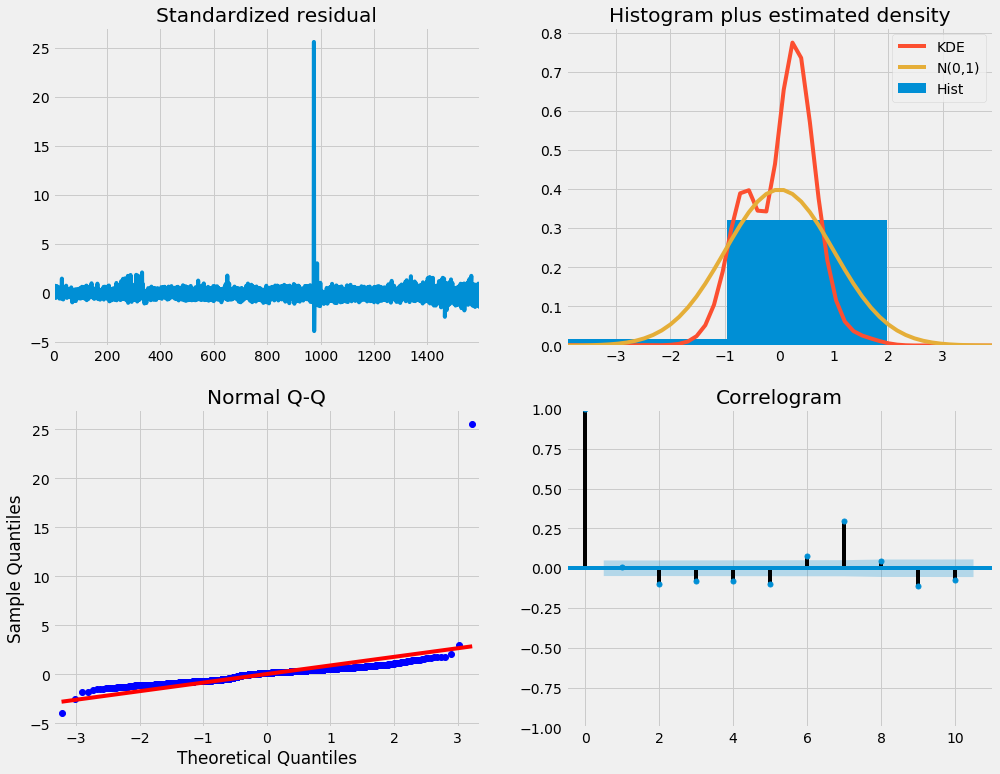

In [82]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [103]:
pred= results.get_prediction(start= 1614, dynamic=False)

pred_ci = pred.conf_int()

In [105]:
pred

In [107]:
y_forecasted = pred.predicted_mean
y_truth = c[1614:]

#mse= ((y_forecasted -y_truth)**2).mean()

#print('The mean squared error of our forecasts is {}'.format(round(mse,2)))
#print('The root mean squared error is :', np.sqrt(mse))

In [108]:
def mean_absolute_percentage_error(y_true, y_pred): 
    #Calculates MAPE given y_true and y_pred
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=y_truth,
                   y_pred= y_forecasted)

28.739616702164376

## Using resampled average months for forecast with fbprophet

In [19]:
# Checking for missing values where y is or resampled column of daily sales
y.isnull().sum()

1

In [20]:
y.dropna(inplace=True)

In [21]:
y.shape

(54,)

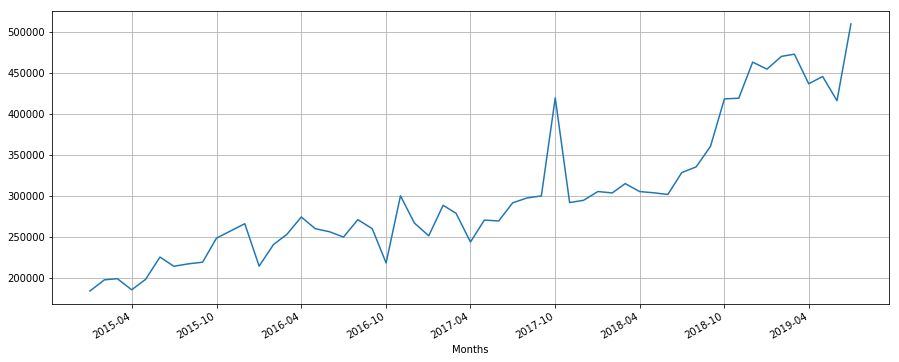

In [22]:
# To visualize our time series data
y.plot(figsize=(15,6), grid=True)
plt.xlabel('Months')
plt.show()

## Using FBprophet 

In [35]:
# Importing the necesary libraries
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [36]:
# Loading the dataset
Z=pd.read_csv('Time_series_data.csv')


In [37]:
# Dropping missing values
Z=Z.dropna()
# Slicing the dataset to select eatures of interest
Sales=Z.loc[:, ['Date', 'Daily_Sales']]
# Changing the index to a datetime index so that we can resample
Sales['Date'] = pd.DatetimeIndex(Sales['Date'])

In [38]:
Sales.index=Sales['Date']
# Resampling
Y=Sales.resample('MS').mean()

In [39]:
Y['Date']=Y.index

In [40]:
# from the prophet documentation every variables should have specific names
Y = Y.rename(columns = {'Date': 'ds',
                                'Daily_Sales': 'y'})
Y.head()

,y,ds
Date,,
2015-01-01,184610.967742,2015-01-01
2015-02-01,198127.857143,2015-02-01
2015-03-01,199578.100000,2015-03-01
2015-04-01,186013.103448,2015-04-01
2015-05-01,198734.032258,2015-05-01


In [41]:
# Changing the range from datetime format to int  
Y.index=range(len(Y))

In [43]:
# Dropping missing values
Y.dropna(inplace=True)

 Authors of Prophet have abstrated many of the complexities of time series forecasting and made it more intuitive for analysts to work with time series data

To start we instantiate a new prophet object and specify an uncertainty interval

In [44]:
# Set the uncertainty interval to 0.95(the prophet default is 80% )
my_model = Prophet(interval_width=0.95)

In [45]:
#Fit the model on your data
my_model.fit(Y)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In order to obtain forecasts of our time series, we mmust provide Prophet with a new dataframe containing our 'ds' column for the dates we want to predict We do this using the 'make_future_dataframe' function of Prophet.

In [46]:
# We create the future dates we want prophet to forecast
future_dates= my_model.make_future_dataframe(periods=36, freq='MS')
# to preview the dataframe
future_dates.tail()

,ds
85,2022-03-01
86,2022-04-01
87,2022-05-01
88,2022-06-01
89,2022-07-01


When working with Prophet it important to know the frequency of the dataset. Since our frequency is monthly, we specify the frequency to be 'MS'

Since our period is 36, we are predicting for 3 years

In [47]:
# We predict using the function below
forecast= my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
85,2022-03-01,781401.681417,719383.596652,853611.253185
86,2022-04-01,768511.252454,698539.652834,839468.772430
87,2022-05-01,779354.385046,712109.816105,850662.031600
88,2022-06-01,780970.898931,712529.004470,855407.691301
89,2022-07-01,811947.909906,734811.921618,888862.164616


In [48]:
# To generate predictions on existing sales
valid= my_model.predict(Y)

In [49]:
# To evaluate our model
from sklearn.metrics import mean_squared_error
x=Y['y']
z=valid['yhat']

mse= mean_squared_error(x, z)
print('The Mean Squared Error is :', mse)
print('The RMSE is:' ,np.sqrt(mse))

The Mean Squared Error is : 585516777.6259544
The RMSE is: 24197.45394924752


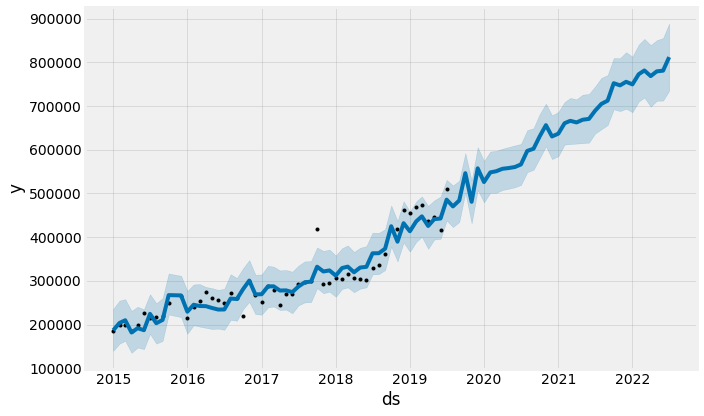

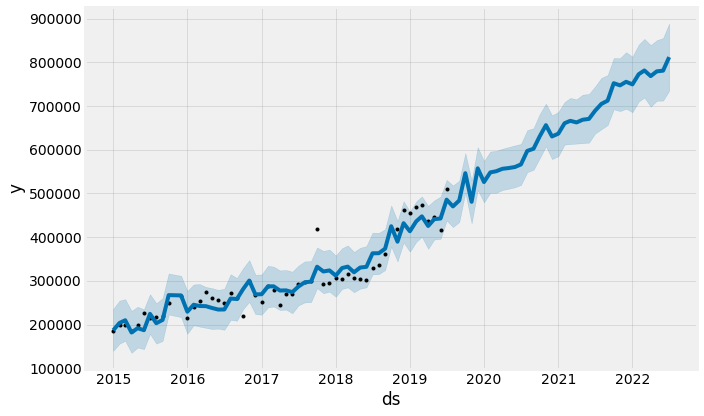

In [50]:
# To visualize our data , forecast and confidence intervals
my_model.plot(forecast, uncertainty=True)

Prophet plots the observed values of our time series(the black dots), the forecasted values(the blue line) and the uncertainty intervals of our forecasts(blue shaded regions)

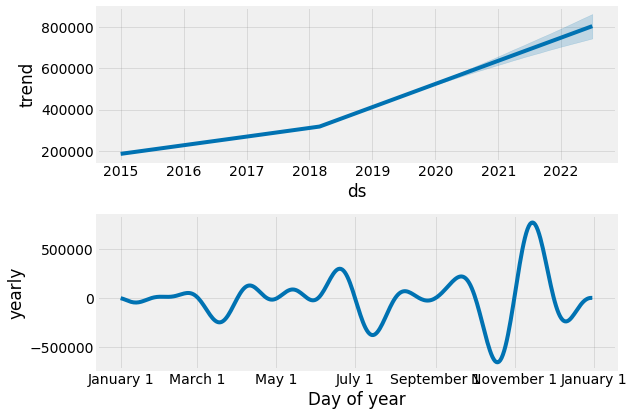

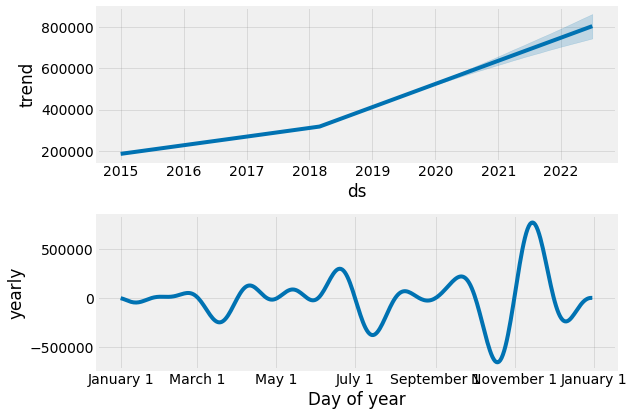

In [51]:
my_model.plot_components(forecast)